In [1]:
from datetime import datetime
import matplotlib.gridspec as gds
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from mpl_finance import candlestick2_ohlc
import numpy as np
import pandas as pd
import pandas_datareader.data as web

In [2]:
s, e = datetime(2017, 9, 1), datetime(2017, 12, 31)
hk2018 = web.DataReader('2018.HK', 'yahoo', s, e)

In [3]:
def moving_avg(price, n=20, method='EMA'):
    if method == 'EMA':
        ma = price.ewm(min_periods=0, adjust=True, ignore_na=False, com=n).mean()
        ma = ma.rename('EMA({0})'.format(str(n)))
    elif method == 'SMA':
        ma = price.rolling(center=False, window=n).mean()
        ma = ma.rename('SMA({0})'.format(str(n)))
    elif method == 'WMA':
        pass
    return ma

In [4]:
hk2018['EMA50'] = moving_avg(hk2018['Adj Close'], n=50, method='EMA')
hk2018['EMA200'] = moving_avg(hk2018['Adj Close'], n=200, method='EMA')

In [5]:
hk2018 = hk2018.dropna()

In [6]:
xdate = [i for i in hk2018.index.to_pydatetime()]
hk2018_copy = hk2018.reset_index()

In [7]:
fig = plt.figure(figsize=(6,8))
gs = gds.GridSpec(2, 1, height_ratios=[3, 1])
ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])

In [8]:
candlestick2_ohlc(ax1, hk2018_copy.Open, hk2018_copy.High, hk2018_copy.Low, hk2018_copy.Close, width=1, colorup='#77d879', colordown='#db3f3f')
hk2018_copy.EMA50.plot(ax=ax1, label='EMA(50)')
hk2018_copy.EMA200.plot(ax=ax1, label='EMA(200)')

In [9]:
def mydate(x, pos):
        try:
            return xdate[int(x)].strftime('%b %d')
        except IndexError:
            return ''
ax1.xaxis.set_major_formatter(FuncFormatter(mydate))

In [10]:
def rsi(price, n=14, method='EMA'):
    delta = price.diff()
    dUp, dDown = delta.copy(), delta.copy()
    dUp[dUp < 0] = 0
    dDown[dDown > 0] = 0
    RolUp = moving_avg(dUp, n, method=method)
    RolDown = moving_avg(dDown.abs(), n, method=method)
    RS = RolUp / RolDown
    RSI = 100.0 - (100.0 / (1 + RS))
    RSI = RSI.rename('RSI({0})'.format(method))
    return RSI

In [11]:
rsi_ema = rsi(hk2018['Adj Close'], n=14, method='EMA').dropna()

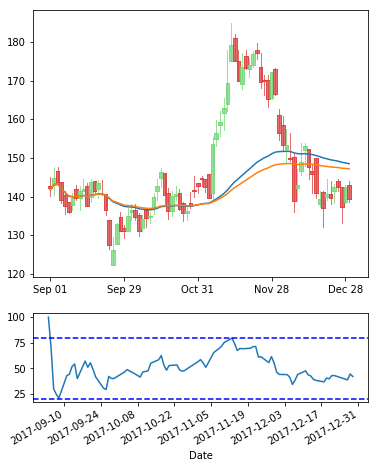

In [12]:
rsi_ema.plot(ax=ax2, y='RSI(EMA)', label='RSI(EMA)')
ax2.axhline(y=80, color='b', linestyle='--')
ax2.axhline(y=20, color='b', linestyle='--')

plt.show()